# 확률변수

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 한글출력 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #폰트: 맑은 고딕으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False    #그래프축 값 마이너스 표시


## 1.이산확률변수

불공정한 주사위의 확률분포를 아래와 같이 가정할 때 

  눈:확률 = {1:1/21,2:2/21,3:3/21,4:4/21,5:5/21,6:6/21}

 - 주사위의 눈의 수를 X: 확률변수 (함수)
 - 확률변수 X의 상태공간: x_set

In [155]:
# 확률변수 X의 상태공간 (확률변수가 취할 수 있는 값)
x_set = np.array([1,2,3,4,5,6])

#### 확률변수

In [156]:
# 확률변수 X(함수)
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [157]:
X = [x_set, f]  
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

#### 확률을 나타내면

In [161]:
# 확률변수 X의 확률
prob = np.array([ f(x_k) for x_k in x_set])
prob

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

 - 확률의 합은

In [165]:
np.sum(prob)  # 데이터 타입에 의해서(소수점에 의해 1이 안되는 경우가 있음)

0.9999999999999999

In [166]:
sum(prob)

0.9999999999999999

In [167]:
import math
math.fsum(prob)

1.0

In [168]:
np.all(prob >= 0)

True

In [169]:
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

- 확률변수가 취할 수 있는 값과 확률의 대응 그래프

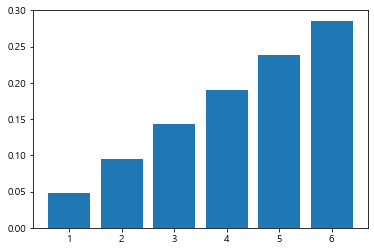

In [176]:
plt.bar(x_set, prob)
plt.show()

#### 누적분포함수(분포함수): F(x)

In [170]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [171]:
# 눈이 3 이하가 되는 확률
F(3)

0.2857142857142857

#### 기대값: 확률변수의 평균
 - 확률변수를 몇 번이나(무제한) 시행하여 얻어진 실현값의 평균
 - 무제한 시행할 수 없으므로 확률변수가 취할 수 있는 값과 확률의 곱의 총합
  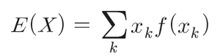

In [172]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [173]:
# 주사위를 100번 굴릴 때
# random.choice(a, size=None, replace=True, p=None)
def E(t) :
    sample = np.random.choice(x_set, t, p=prob)
    return np.mean(sample)

E(100)

4.29

In [174]:
# 10만번
E(100000)

4.33314

In [175]:
# 100만번
E(1000000)

4.333503

 g 함수식 적용
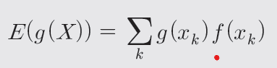

In [229]:
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

E(X)

3.75

### 확률질량함수와 확률 구하기

### 예제 6-3:주사위를 두 번 반복 시행해서 두 눈의 차의 절대값: 확률변수 X (ppt.26)

- 상태공간

In [188]:
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]
X = list()
for i in d1:
    for j in d2:        
        X.append(abs(i-j))
x_set = np.array(list(set(X)))
x_set

array([0, 1, 2, 3, 4, 5])

- 확률변수

In [189]:
# 확률변수 X(함수)
def f(x) :
    cnt = 0
    for i in d1:
        for j in d2:        
            if abs(i-j) == x: 
                cnt += 1
    return cnt / (len(d1)*len(d2))

In [190]:
f(0) # 1, 2, 3...

0.16666666666666666

In [191]:
X = [x_set, f]

- 확률변수 X의 확률

In [192]:
# 확률변수 X의 확률
prob = np.array([ f(x_k) for x_k in x_set])
prob

array([0.16666667, 0.27777778, 0.22222222, 0.16666667, 0.11111111,
       0.05555556])

- 확률의 합

In [193]:
np.sum(prob)

1.0

- 확률변수의 상태 값과 확률

In [194]:
dict(zip(x_set, np.round(prob,3)))

{0: 0.167, 1: 0.278, 2: 0.222, 3: 0.167, 4: 0.111, 5: 0.056}

### 예제 6-4 (ppt.35)

- 누적분포함수(분포함수)

In [195]:
def F(x): 
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])


In [196]:
# P(X=3)절대값이 3 이하가 되는 확률
F(3) - F(2)

0.16666666666666663

In [197]:
# P(2<=X<=4)
F(4) - F(2) + prob[2]

0.5

In [198]:
#P(X>=4) = 1 - P(X<=3)
1-F(3)

0.16666666666666674

### 예제:6-9 (이산확률변수의 평균- 기대값)

In [199]:
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

E(X)

1.9444444444444446

In [227]:
E(X, g=lambda x:2*x+3)

11.25

### 분산
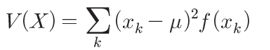

In [225]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

5.3125

In [226]:
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

V(X)

1.953125

In [228]:
V(X, g=lambda x:2*x+3)

11.328125

## 2.연속확률변수

### 20세 이상 남성 키 데이터
https://sizekorea.kr/page/report/1

In [200]:
import pandas as pd

# 한글사용할 때 engine='python'
datas = pd.read_csv('data/data_10.csv', encoding='utf-8')
datas

,성별,나이,키
0,남,25,1736.0
1,남,28,1833.0
2,남,19,1744.0
3,남,20,1751.0
4,남,22,1851.0
...,...,...,...
6415,여,20,1706.0
6416,여,20,1624.0
6417,여,44,1508.0
6418,여,20,1574.0


In [201]:
df = pd.DataFrame(datas)
df = df.query("성별=='남' and 나이>=20 and 나이<30")
df['키'] = df['키']//10
df

,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
4853,남,25,168.0
4856,남,29,174.0
4857,남,25,173.0
4867,남,24,168.0


In [202]:
# 데이터 추출
data = df.head(100)  # df.iloc[0:100]
data

,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
1101,남,27,170.0
1106,남,25,180.0
1198,남,26,175.0
1205,남,26,174.0


#### 히스토그램 구간: '키' 로 지정

In [203]:
# 히스토그램 구간 만들기
height = set(data['키'])

# int형으로 변환
bins = list(map(int, height)) # int형으로 변환
#bins

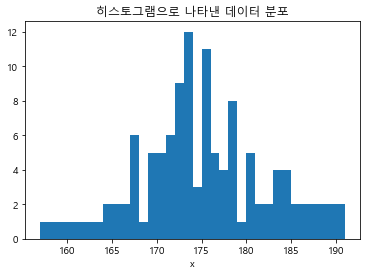

In [204]:
# 히스토그램 나타내기
plt.hist(data['키'], bins=bins) 
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

#### * 히스토그램 구간 개수를 지정해서 나타낼 경우

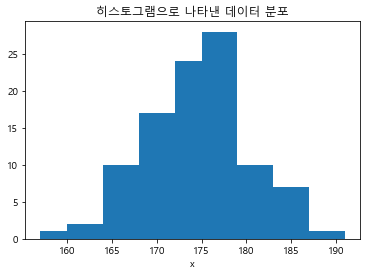

In [205]:
#최소~최대를 10개의 구간으로 분할하기
bins = np.linspace(min(height), max(height), 10) 

# int형으로 변환
bins = list(map(int, bins)) # int형으로 변환

# 히스토그램 나타내기
plt.hist(data['키'], bins=bins) 
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

### 그래프 여러 개 하나로 나타내기

#### 1. 행

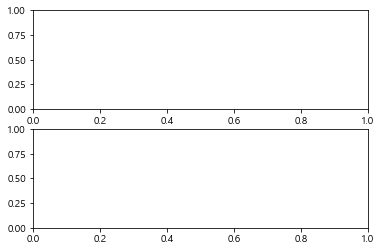

In [206]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
plt.show()

#### 2.열

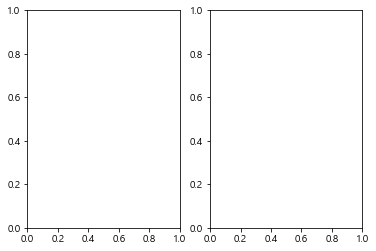

In [207]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1) #==fig.add_subplot(121)
ax2 = fig.add_subplot(1, 2, 2)
plt.show()

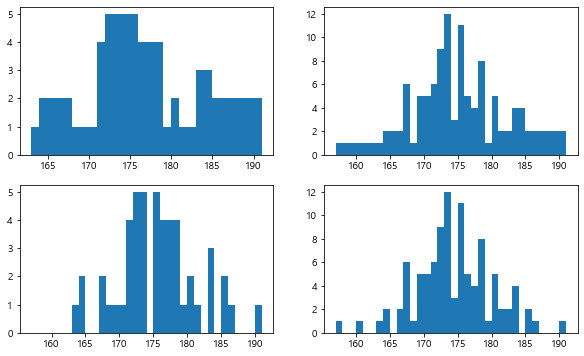

In [208]:
# 데이터 추출
data1 = df.head(50)  
data2 = df.head(100)
data3 = df.head(500)  
data4 = df

bins1 = list(map(int, set(data1['키']))) # int형으로 변환
bins2 = list(map(int, set(data2['키']))) # int형으로 변환
bins3 = list(map(int, set(data3['키']))) 
bins4 = list(map(int, set(data4['키']))) 

w = 10
h = 6
fig = plt.figure(figsize=(w, h))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(data1['키'], bins=bins1) 
ax2.hist(data2['키'], bins=bins2)
ax3.hist(data1['키'], bins=bins3) 
ax4.hist(data2['키'], bins=bins4)

plt.show()

### 그래프에 수평선/수직선 그리기

- Axes.hlines(self, y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.vlines(self, x, ymin, ymax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.fill_between(self, x, y1, y2=0, where=None, interpolate=False,
                     step=None, **kwargs)

[0 1 2 3 4 5 6 7 8 9] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


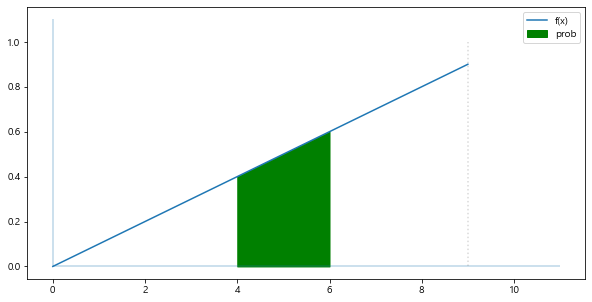

In [209]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#x = [i for i in range(0,10)]
x = np.arange(0,10,1)
y = np.linspace(0, 0.9, 10)
ax.plot(x,y,label='f(x)')
print(x, y)

# 선 그리기
#ax.hlines(0, 0, 11, alpha=0.3, color='gray', linestyles='solid')
ax.hlines(0, 0, 11, alpha=0.3)
ax.vlines(0, 0, 1.1, alpha=0.3)
ax.vlines(max(x), 0, 1, alpha=0.3, color='gray', linestyles=':' )

# 구간 색칠하기
ax.fill_between(x, y, where=(x>=4)&(x<=6), label='prob', color='green')
ax.legend()

plt.show()

### 확률밀도함수
### 예제 6-7: 

In [210]:
x_range = np.array([0,4])
x_range

array([0, 4])

In [211]:
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

In [212]:
X = [x_range, f]

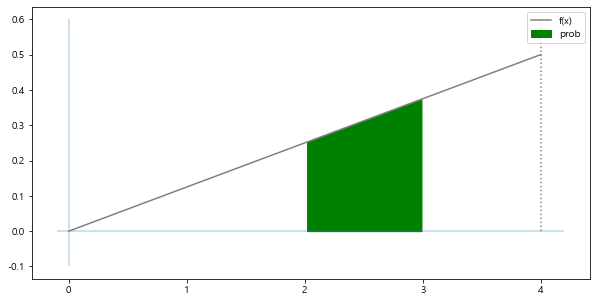

In [213]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)  

data = np.linspace(x_range[0], x_range[1], 100)
y = [f(x) for x in data]
ax.plot(data, y, color='gray', label='f(x)')
ax.hlines(0, -0.1, 4.2, alpha=0.3)
ax.vlines(0, -0.1, 0.6, alpha=0.3)
ax.vlines(data.max(), 0, 0.6, linestyles=':', color='gray')

# 구간 색칠하기
ax.fill_between(data, y, where=(data>2) & (data<3), label='prob', color='green')
ax.legend()

plt.show()

#### 예제: 
 - 전체 초등학생의 수는 10만명
 - 평균 키는 140, 표준편차는 5
일 때
 - 무작위로 한명을 추출할 때, 145<=키<150일 확률은?


#### 참고 모듈
 - numpy.random.randint(n): 균일분포의 0~n-1사이의 정수 난수 1개 생성
 - numpy.random.rand(m,n) : 0 ~ 1 사이의 균일분포(표준정규분포) 난수를 matrix array(m,n) 생성
 - numpy.random.randn(m,n): 평균 0, 표준편차 1의 가우시안(표준정규분포) 난수를 matrix array(m,n) 생성 

 1. 평균 140, 표준편차 5인 결과로 10만명의 초등학생 키 데이터 만들기

In [214]:
S, MEAN, STD = 100000, 140, 5
data = np.random.randn(S)* STD + MEAN
data

array([149.43917958, 137.07995399, 133.18853672, ..., 136.85779872,
       145.40638259, 135.97750028])

In [215]:
data.mean()

139.994840806607

In [216]:
data.std()

4.9978899203729545

2. 145~150에 속할 확률 구하기

In [217]:
prob = len([ i for i in data if i >=145 and i<150]) / S
prob

0.13507

3. 그래프로 나타내기

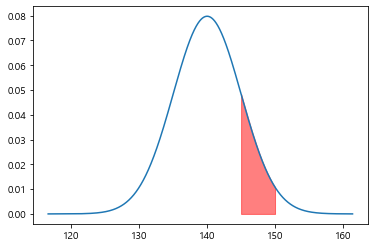

In [218]:
from scipy.stats import norm   # 정규분포관련
data.sort()
y = norm.pdf(data, MEAN, STD)  #확률밀도함수에 대한 표준정규분포
plt.plot(data, y)
plt.fill_between(data, y, where=(data>=145) & (data<150), color='red', alpha=0.5)
plt.show()

## 3.확률변수의 평균과 분산

### 예제: 상품권과 복권 수, 평균 상금

1. 표로 나타내기

In [219]:
columns=['상품권','복권수']
data=[[100,2],[50,8],[10,10],[0,30]]
df=pd.DataFrame(data, columns=columns)
df.columns.name='복권'
df

복권,상품권,복권수
0,100,2
1,50,8
2,10,10
3,0,30


2. 당첨 확률 표시하기 (상대도수)

In [220]:
total = df['복권수'].sum()
df['당첨확률'] = [ val/total for idx, val in enumerate(df['복권수']) ]
df               

복권,상품권,복권수,당첨확률
0,100,2,0.04
1,50,8,0.16
2,10,10,0.20
3,0,30,0.60


3. 평균 상금

In [221]:
sum([ val*df['당첨확률'][idx] for idx, val in enumerate(df['상품권']) ])

14.0

### 예제:6-9 (이산확률변수의 평균) 

- 기대값(Expectation): 확률변수의 이론적 평균값
- 이산확률변수의 기댓값은 표본공간의 원소 xi의 가중평균이다